✅ 字体加载成功: Microsoft YaHei


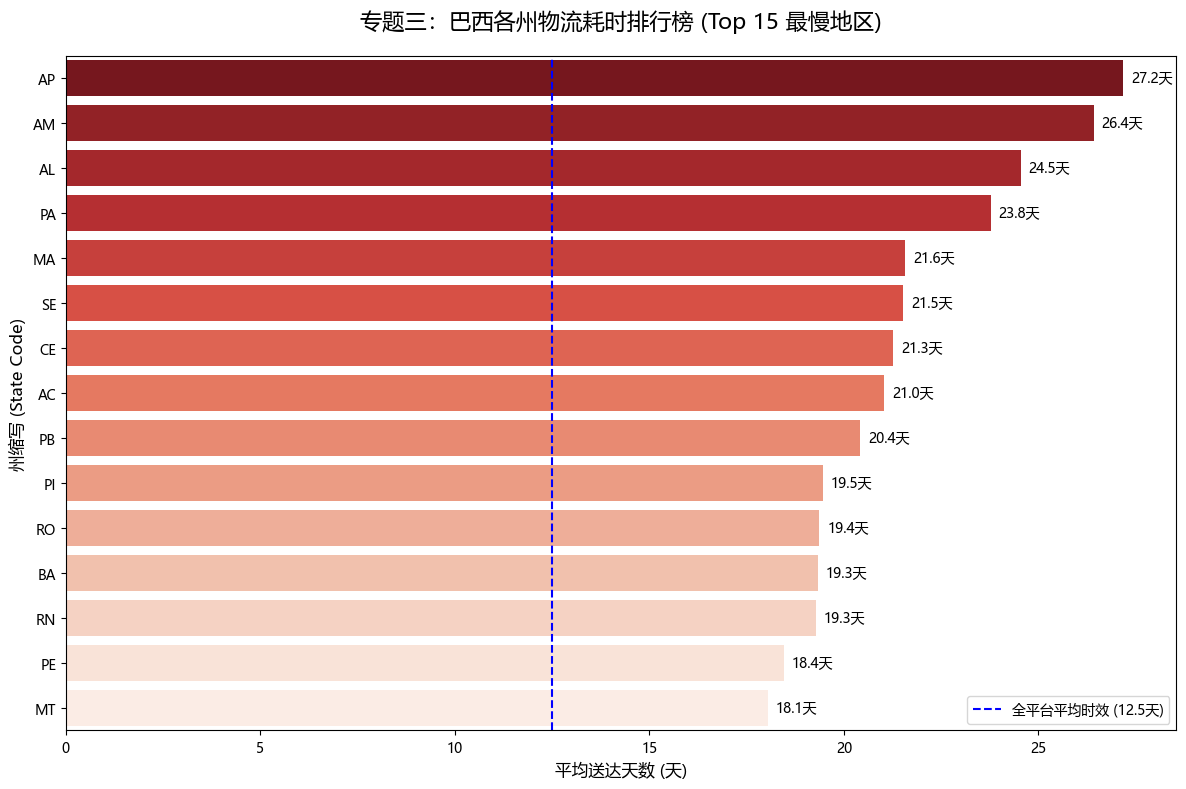

In [1]:
from config import *


# 1. 执行 SQL 获取地域数据
query_geo = """
SELECT 
    c.customer_state,
    COUNT(ood.order_id) AS total_orders,
    AVG(JULIANDAY(ood.order_delivered_customer_date) - JULIANDAY(ood.order_purchase_timestamp)) AS avg_delivery_days
FROM olist_orders_dataset ood
JOIN olist_customers_dataset c ON ood.customer_id = c.customer_id
WHERE ood.order_status = 'delivered'
  AND ood.order_delivered_customer_date IS NOT NULL
GROUP BY 1
HAVING total_orders > 50
ORDER BY avg_delivery_days DESC;
"""
df_geo = pd.read_sql(query_geo, conn)

# 2. 绘图设置
plt.figure(figsize=(12, 8))
# 使用红色渐变色，颜色越深代表物流越慢，预警意味越强
ax = sns.barplot(
    x='avg_delivery_days', 
    y='customer_state', 
    data=df_geo.head(15), # 展示最慢的前15个州
   hue='customer_state',  # 明确指定按州名着色
    palette='Reds_r',
    legend=False           # 隐藏侧边多余的图例
)

# 3. 添加装饰与标注
plt.title('专题三：巴西各州物流耗时排行榜 (Top 15 最慢地区)', fontsize=16, pad=20)
plt.xlabel('平均送达天数 (天)', fontsize=12)
plt.ylabel('州缩写 (State Code)', fontsize=12)

# 在条形图末端加上具体天数
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1f}天', 
                (p.get_width() + 0.2, p.get_y() + p.get_height()/2), 
                va='center', fontsize=10)

# 添加一条全平台平均线的参考点（假设全平台平均12天）
plt.axvline(12.5, color='blue', linestyle='--', label='全平台平均时效 (12.5天)')
plt.legend()

plt.tight_layout()
plt.show()


